# Recognizing handwritten digits

In [11]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [10]:
import matplotlib.pyplot as plt
import numpy as np

### Get data

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [13]:
print(f"X Train Shape: {X_train.shape}")
print(f"y Train Shape: {y_train.shape}")

print(f"X Test Shape: {X_test.shape}")
print(f"y Test Shape: {y_test.shape}")

X Train Shape: (60000, 28, 28)
y Train Shape: (60000,)
X Test Shape: (10000, 28, 28)
y Test Shape: (10000,)


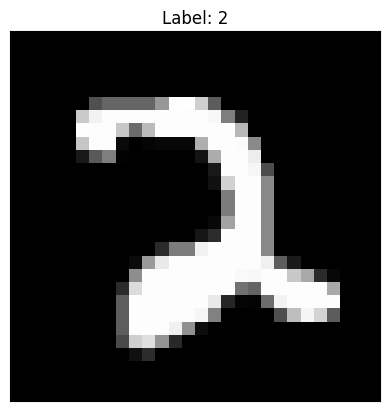

In [14]:
plt.imshow(X_train[4610], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(f"Label: {y_train[4610]}")
plt.show()

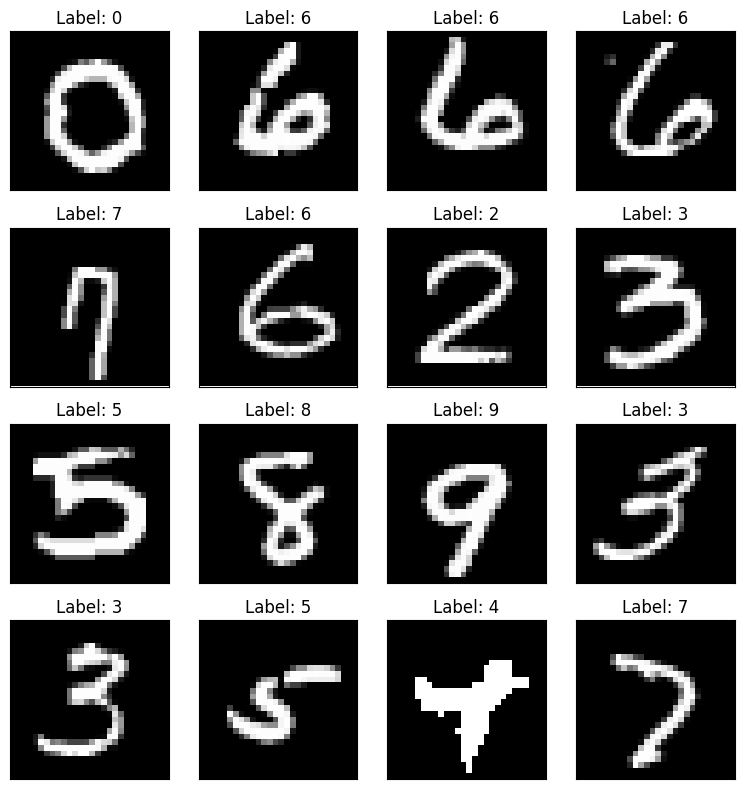

In [15]:
plt.figure(figsize=(8, 8))
n = 4
for i in range(n * n):
    plt.subplot(n, n, i + 1)
    random_idx = np.random.randint(0, X_train.shape[0])
    plt.imshow(X_train[random_idx], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label: {y_train[random_idx]}")
    plt.tight_layout()

plt.show()

### Y value transformation to array

In [16]:
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [17]:
print(y_train[6942])
print(Y_train[6942])

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [48]:
print(y_train[3897])
print(Y_train[3897])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### Normalizing data

In [18]:
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

In [50]:
print(X_train[369])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 113 244 195   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    6  91 236 249  73   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44   0   0   0   0   0   0
   23 252 252 150   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  47 238 152   0   0   

In [51]:
print(X_train_normalized[369])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

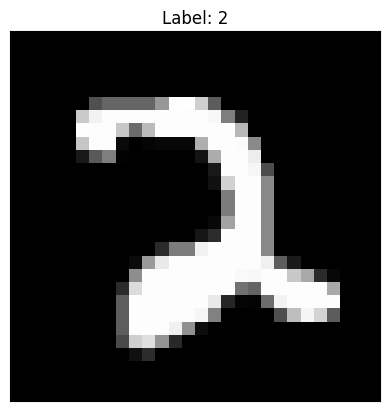

In [52]:
plt.imshow(X_train_normalized[4610], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title(f"Label: {y_train[4610]}")
plt.show()

## Making the model (Sequential, using flatten and dense)

In [65]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [66]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [68]:
history = model.fit(X_train_normalized, Y_train, batch_size=64, epochs=100)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.9193 - loss: 0.2851
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.9657 - loss: 0.1166
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9746 - loss: 0.0840
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9811 - loss: 0.0633
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.9831 - loss: 0.0528
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9868 - loss: 0.0412
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.9892 - loss: 0.0344
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.9911 - loss: 0.0276
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.9926 - loss: 0.0229
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9928 - loss: 0.0216
Epoch 11/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.9946 - loss: 0.0163
Epoch 12/100
938/93

In [69]:
Y_hat = model.predict(X_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


In [70]:
Y_hat[1976]

array([0.0000000e+00, 1.3201750e-28, 6.2571923e-32, 1.0000000e+00,
       0.0000000e+00, 3.9523401e-26, 0.0000000e+00, 3.3432452e-33,
       1.7558543e-27, 1.1523399e-33], dtype=float32)

In [71]:
np.argmax(Y_hat[1976])

np.int64(3)

In [72]:
y_hat = np.argmax(Y_hat, axis=-1)

In [74]:
test_accuracy = np.mean(y_hat == y_test)
print(y_hat)
print(test_accuracy)

[7 2 1 ... 4 5 6]
0.9799


# __CNN__

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [6]:
# Two convolutional layers
# Then fully connected feed-forward

cnn_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/Users/andrewlou/Documents/Coding/NYU-Machine-Learning/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,218 (94.60 KB)

 Trainable params: 24,218 (94.60 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
cnn_history = cnn_model.fit(X_train_normalized, Y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9240 - loss: 0.2391
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9790 - loss: 0.0681
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9848 - loss: 0.0494
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9883 - loss: 0.0376
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9898 - loss: 0.0321


In [ ]:
plt.plot(cnn_history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [20]:
cnn_preds = cnn_model.predict(X_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
cnn_y_pred = np.argmax(cnn_preds, axis=-1)

In [22]:
cnn_test_acc = np.mean(cnn_y_pred == y_test)
print(cnn_test_acc)

0.9891


In [23]:
cnn_model.save('model.keras')

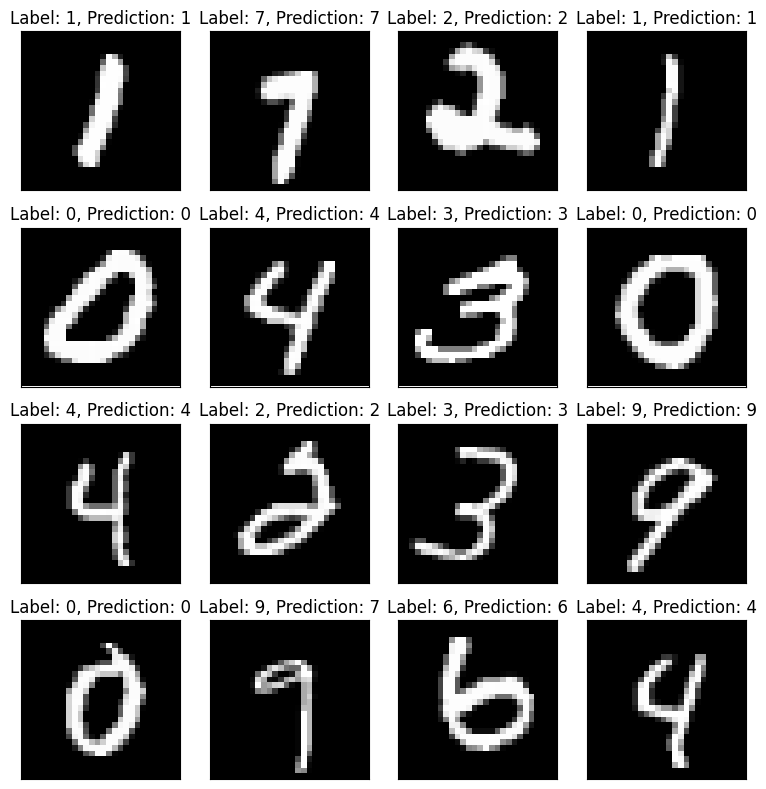

In [25]:
plt.figure(figsize=(8, 8))
n = 4
for i in range(n * n):
    plt.subplot(n, n, i + 1)
    random_idx = np.random.randint(0, X_test.shape[0])
    plt.imshow(X_test[random_idx], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Label: {y_test[random_idx]}, Prediction: {cnn_y_pred[random_idx]}")
    plt.tight_layout()

plt.show()